
    1.Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями
    2. Добавьте первые разности по стоимости доллара и евро к рублю сделайте ее перрасчет (ресемплинг) в представление по    неделям.
    3. Постройте модель предсказания 1-й точки от текущей (h=1).
    4. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import os

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#### 1

In [3]:
brent = pd.read_csv('my_BRENT2019.csv', index_col=[0], parse_dates=[0])
brent.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [4]:
brent_diff_values = brent['Значение'].values[1:]- brent['Значение'].values[:-1]
brent_diff = pd.DataFrame(data = brent_diff_values, index = brent.index[:2666], columns=['Значение'])
brent_diff

,Значение
Дата,
2010-09-01,0.52
2010-09-02,-0.32
2010-09-03,0.05
2010-09-04,0.01
2010-09-05,0.24
2010-09-06,0.39
2010-09-07,0.67
2010-09-08,-0.72
2010-09-09,1.20


#### 2

In [5]:
usd = pd.read_excel(io='RC_F01_09_2010_T01_09_2019.xlsx', index_col='data', usecols=[1, 2])
usd.head()

,curs
data,
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [7]:
usd_values = usd['curs'].values[1:]- usd['curs'].values[:-1]
usd_diff = pd.DataFrame(data = usd_values, index = usd.index[:2227], columns=['curs_usd'])
usd_diff

,curs_usd
data,
2010-09-01,-0.0668
2010-09-02,-0.1143
2010-09-03,0.0064
2010-09-04,-0.1151
2010-09-07,0.1548
2010-09-08,0.1554
2010-09-09,-0.0072
2010-09-10,0.0136
2010-09-11,-0.2106


In [8]:
euro = pd.read_excel(io='R_E01_09_2010_T01_09_2019.xlsx', index_col='data', usecols=[1, 2])
euro.head()

,curs
data,
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


In [9]:
euro_values = euro['curs'].values[1:]- euro['curs'].values[:-1]
euro_diff = pd.DataFrame(data = euro_values, index = euro.index[:2227], columns=['curs_euro'])
euro_diff.head()

,curs_euro
data,
2010-09-01,0.1527
2010-09-02,0.1247
2010-09-03,0.0604
2010-09-04,0.1215
2010-09-07,-0.1505


In [11]:
all_diff = pd.concat([usd_diff, euro_diff], axis=1)
all_diff = pd.concat([brent_diff, all_diff], axis=1)
all_diff = all_diff.dropna()
all_diff

,Значение,curs_usd,curs_euro
2010-09-01,0.52,-0.0668,0.1527
2010-09-02,-0.32,-0.1143,0.1247
2010-09-03,0.05,0.0064,0.0604
2010-09-04,0.01,-0.1151,0.1215
2010-09-07,0.67,0.1548,-0.1505
2010-09-08,-0.72,0.1554,-0.0267
2010-09-09,1.20,-0.0072,-0.1080
2010-09-10,-0.05,0.0136,0.0049
2010-09-11,0.83,-0.2106,0.1318
2010-09-14,0.10,0.0218,0.2029


In [12]:
all_diff_w = all_diff.resample('W').mean()
all_diff_w.head()

,Значение,curs_usd,curs_euro
2010-09-05,0.0650,-0.072450,0.114825
2010-09-12,0.3860,0.021200,-0.029700
2010-09-19,-0.2175,0.099875,0.372000
2010-09-26,0.2100,-0.008225,0.179575
2010-10-03,1.2100,-0.025625,0.109650


#### 3,4

In [13]:
def split_data( data, split_date ):
    return data.loc[data.index <= split_date].copy(), \
           data.loc[data.index >  split_date].copy()

C:\Users\stroganov\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


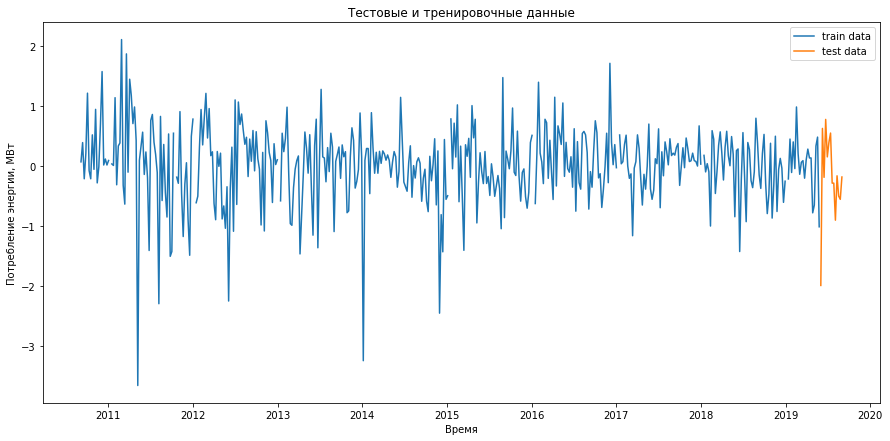

In [15]:
train, test = split_data(all_diff_w, '06-01-2019')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index,train['Значение'], label='train data' )
plt.plot(test.index,test['Значение'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [16]:
X_train = train.loc[:, train.columns != 'Значение']
Y_train = train['Значение']
X_test = test.loc[:, train.columns != 'Значение']
Y_test = test['Значение']

In [17]:
X_train[['curs_usd','curs_euro']] = X_train[['curs_usd','curs_euro']].astype(np.float32)
Y_train = Y_train.astype(np.float32)
X_test[['curs_usd','curs_euro']] = X_test[['curs_usd','curs_euro']].astype(np.float32)
Y_test = Y_test.astype(np.float32)

C:\Users\stroganov\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [18]:
X_train = X_train.dropna()
Y_train = Y_train.dropna()
X_test = X_test.dropna()
Y_test = Y_test.dropna()

Прогноз GradientBoostingRegressor

In [20]:
model_brent = GradientBoostingRegressor(max_depth=4, random_state=0, n_estimators=200)
model_brent.fit( X_train, Y_train )

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
Y_test_pred= model_brent.predict(X_test)

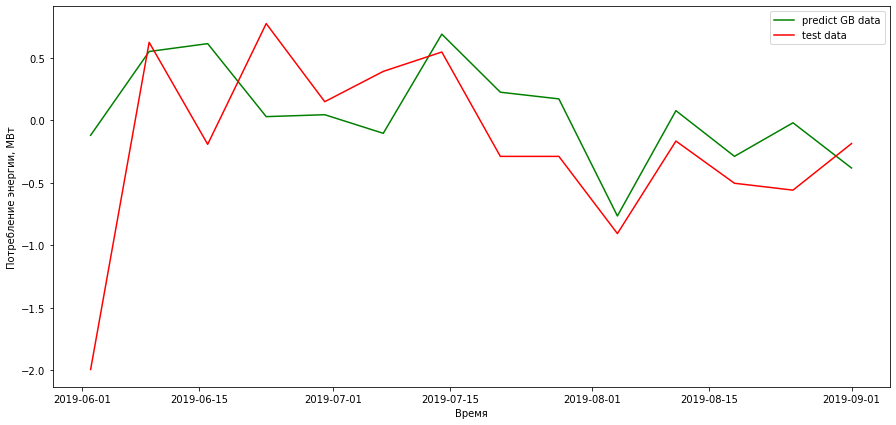

In [25]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(Y_test.index,Y_test_pred, 'g',label='predict GB data' )
plt.plot(Y_test.index,Y_test, 'r', label='test data')

plt.legend()
plt.show()

In [23]:
er_mse = mean_squared_error(Y_test, Y_test_pred) 
er_mae = mean_absolute_error(Y_test, Y_test_pred) 
er_r2 = r2_score(Y_test, Y_test_pred)

print('ошибка mse :  ', er_mse,'\nошибка mae  :  ', er_mae,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.4232009926770394 
ошибка mae  :   0.4676250644856426 
оценка R2 :   0.10317732720731554


По сравнению с прямым прогнозированием использование временного ряда с первыми разностями уменьшает значение ошибок, а также коэффициент детерминации